Saving train.csv to train.csv
Dataset Shape: (891, 12)

Dataset Preview:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



--- Basic Statistics ---
             count unique                  top freq       mean         std  \
PassengerId  891.0    NaN                  NaN  NaN      446.0  257.353842   
Survived     891.0    NaN                  NaN  NaN   0.383838    0.486592   
Pclass       891.0    NaN                  NaN  NaN   2.308642    0.836071   
Name           891    891  Dooley, Mr. Patrick    1        NaN         NaN   
Sex            891      2                 male  577        NaN         NaN   
Age          714.0    NaN                  NaN  NaN  29.699118   14.526497   
SibSp        891.0    NaN                  NaN  NaN   0.523008    1.102743   
Parch        891.0    NaN                  NaN  NaN   0.381594    0.806057   
Ticket         891    681               347082    7        NaN         NaN   
Fare         891.0    NaN                  NaN  NaN  32.204208   49.693429   
Cabin          204    147                   G6    4        NaN         NaN   
Embarked       889      3             

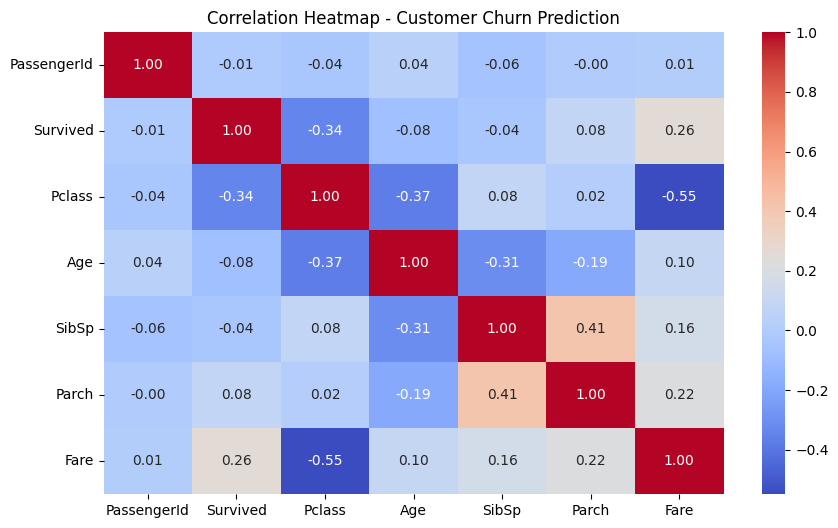


✅ Insights:
• The correlation with 'Churn' shows which factors most influence customer leaving or staying.
• Positive correlation → higher churn likelihood when feature increases.
• Negative correlation → lower churn likelihood when feature increases.


In [1]:
# --- Assignment 4: Statistics & Correlation Analysis (Customer Churn Prediction) ---

# Install required libraries (if not already installed)
!pip install --quiet pandas numpy matplotlib seaborn

# --- Imports ---
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --- Load Dataset ---
from google.colab import files
uploaded = files.upload()  # Upload train.csv
df = pd.read_csv("train.csv")

# --- Basic Info ---
print("Dataset Shape:", df.shape)
print("\nDataset Preview:")
display(df.head())

# --- Descriptive Statistics ---
print("\n--- Basic Statistics ---")
print(df.describe(include='all').T)

# --- Mean, Median, Mode, Variance ---
print("\n--- Central Tendency & Variability ---")
for col in df.select_dtypes(include=[np.number]).columns:
    print(f"\nColumn: {col}")
    print(f"Mean: {df[col].mean():.3f}")
    print(f"Median: {df[col].median():.3f}")
    print(f"Mode: {df[col].mode().values[0]}")
    print(f"Variance: {df[col].var():.3f}")

# --- Correlation with Churn Column ---
if 'Churn' in df.columns:
    churn_corr = df.corr(numeric_only=True)['Churn'].sort_values(ascending=False)
    print("\n--- Correlation with Churn ---")
    display(churn_corr)

    # --- Visualize Top Correlated Features with Churn ---
    plt.figure(figsize=(8,5))
    sns.barplot(x=churn_corr.values, y=churn_corr.index, palette='coolwarm')
    plt.title("Feature Correlation with Customer Churn")
    plt.xlabel("Correlation Value")
    plt.ylabel("Features")
    plt.show()
else:
    print("\n⚠️ 'Churn' column not found. Please ensure your dataset includes a 'Churn' target column.")

# --- Correlation Heatmap (Numeric Columns) ---
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap - Customer Churn Prediction")
plt.show()

# --- Insights ---
print("\n✅ Insights:")
print("• The correlation with 'Churn' shows which factors most influence customer leaving or staying.")
print("• Positive correlation → higher churn likelihood when feature increases.")
print("• Negative correlation → lower churn likelihood when feature increases.")
